In [1]:
import numpy as np
import sympy
import math
import matplotlib.pyplot as plt

In [2]:
#Tamaños estándar humanos en mm (radio)
radio_cornea = 12/2
radio_ojo = 25/2

In [22]:
x1 = 3
y1 = 2
x2 = 2
y2 = 4
d_arcos = 0.2

In [3]:
## Prueba Q1 y Q4 -- OK, resultado bueno [1]
x1 = 4
y1 = 1
x2 = 4
y2 = -1
ri = 20
d_arcos = 0.2

In [20]:
## Prueba Q1 y Q2 -- NO SE PUEDE RESOLVER!!!!
x1 = 1
y1 = 4
x2 = -1
y2 = 4
ri = 20
d_arcos = 0.2


In [89]:
## Prueba Q2 y Q3 -- invertido, resultado bueno [1]
x1 = -4
y1 = 1
x2 = -4
y2 = -1
ri = 20
d_arcos = 0.2

In [102]:
## Prueba Q3 y Q4 -- NO SE PUEDE RESOLVER!!!!
x1 = -1
y1 = -4
x2 = 1
y2 = -4
ri = 20
d_arcos = 0.2

In [61]:
## Prueba en Q1 -- OK, resultado bueno [1]
x1 = 2
y1 = 3
x2 = 3
y2 = 2
ri = 20
d_arcos = 0.2

In [57]:
## Prueba en Q2  -- invertido, resultado bueno [1]
x1 = -2
y1 = 3
x2 = -3
y2 = 2
ri = 20
d_arcos = 0.2

In [110]:
## Prueba en Q3 -- invertido, resultado bueno [1]
x1 = -2
y1 = -3
x2 = -3
y2 = -2
ri = 20
d_arcos = 0.2

In [73]:
## Prueba en Q4 -- OK, resultado bueno [1]
x1 = 2
y1 = -3
x2 = 3
y2 = -2
ri = 20
d_arcos = 0.2

In [4]:
def calcula_parametros(x1, y1, x2, y2, ri, d_arcos):
    '''
    Inputs: 
        Punto: (x1, y1)
        Punto: (x2, y2) 
        Radiio circunferencia interna: ri
        Distáncia entre los arcos: d_arcos

    Incógnitas/Outputs: 
        Centro circunferencia externa: (cxe, cye)
        Centro circunferencia interna: (cxi, cyi)
        Radio circunferencia externa: re

    eq1 = Circunferencia externa pasa por punto 1
    eq2 = Circunferencia externa pasa por punto 2
    eq3 = Circunferencia interna pasa por punto 1
    eq4 = Circunferencia interna pasa por punto 2
    eq5 = Distancia entre los arcos (aunque supone que están alineados los centros)

    Resuelve el sistema de ecuaciones cuadráticas siguiente para devolver los outputs necesarios para plottear las circunferencias.
    '''
    cxe, cye, cxi, cyi, re = sympy.symbols("cxe cye cxi cyi re", real=True)

    eq1 = sympy.Eq((x1 - cxe)**2 + (y1 - cye)**2 -(re**2), 0)
    eq2 = sympy.Eq((x2 - cxe)**2 + (y2 - cye)**2 -(re**2), 0)

    eq3 = sympy.Eq((x1 - cxi)**2 + (y1 - cyi)**2 -(ri**2), 0)
    eq4 = sympy.Eq((x2 - cxi)**2 + (y2 - cyi)**2 -(ri**2), 0)

    eq5 = sympy.Eq(re - ri + sympy.sqrt((cxe-cxi)**2+(cye-cyi)**2) - d_arcos, 0)

    result = sympy.solve([eq1, eq2, eq3, eq4, eq5])
    
    cxe = float(result[1][cxe].evalf())
    cye = float(result[1][cye].evalf())
    cxi = float(result[1][cxi].evalf())
    cyi = float(result[1][cyi].evalf())
    re = float(result[1][re].evalf())
    
#     cxe = float(result[0][cxe].evalf())
#     cye = float(result[0][cye].evalf())
#     cxi = float(result[0][cxi].evalf())
#     cyi = float(result[0][cyi].evalf())
#     re = float(result[0][re].evalf())
        
    return cxe, cye, cxi, cyi, re

In [23]:
cxe, cye, cxi, cyi, re = calcula_parametros(x1, y1, x2, y2, ri, d_arcos)

In [24]:
def genera_grafico(x1, y1, x2, y2, cxe, cye, re, cxi, cyi, ri):
    '''
    inputs: 
        Dos puntos en el espacio (x1, y1), (x2, y2)
        Centro de la circunferencia externa (cxe, cye) y su radio re
        Centro de la circunferencia interna (cxi, cyi) y su radio ri

    output: fig: una figura de matplotlib que tiene ploteados los puntos (x1, y1), (x2, y2), la circunferencia externa, la circunferencia interna
                 y la circunferencia de una córnea humana estándar
    '''
    plt.ioff()
    fig, ax =  plt.subplots()
    cm = 1/2.54 #Para convertir el tamaño
    fig.set_size_inches(20*cm, 20*cm)
    
    radio_cornea = 12/2 #Tamaños estándar humanos en mm (radio)

    cornea = plt.Circle((0, 0), radio_cornea, color='turquoise', fill=False)
    corte_externo = plt.Circle((cxe, cye), re, color='red', fill=False, linewidth=0.2)
    corte_interno = plt.Circle((cxi, cyi), ri, color='red', fill=False, linewidth=0.2)

    ax.cla() # clear things for fresh plot

    ax.set_aspect('equal') # Para que el gráfico sea cuadrado

    # Cambiar el límite que se muestra
    ax.set_xlim((-7, 7))
    ax.set_ylim((-7, 7))

    # Plot puntos
    ax.plot((x1), (y1), 'o', color='coral')
    ax.plot((x2), (y2), 'o', color='coral')

    # Plot ejes
    plt.axvline(x = 0, color = 'k', linewidth=0.5)
    plt.axhline(y = 0, color = 'k', linewidth=0.5)

    # Plot los círculos
    ax.add_patch(cornea)
    ax.add_patch(corte_externo)
    ax.add_patch(corte_interno)
    
    return fig

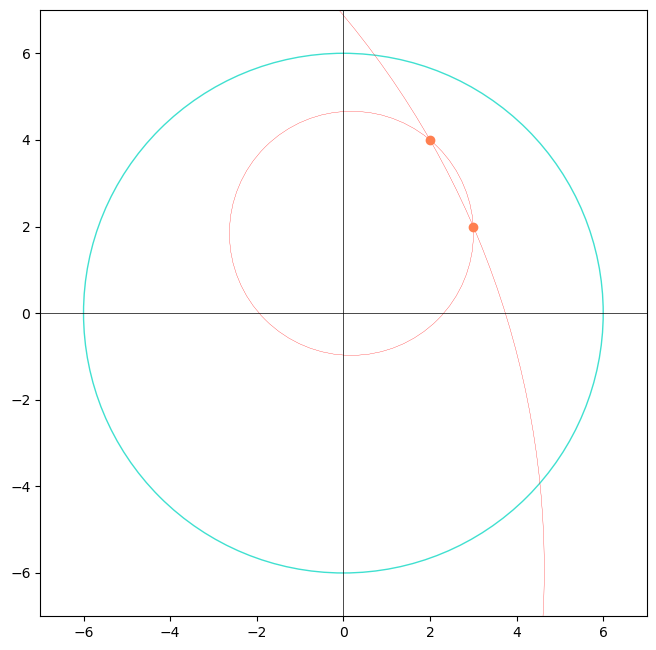

In [25]:
genera_grafico(x1, y1, x2, y2, cxe, cye, re, cxi, cyi, ri)

In [35]:
distancia_entre_arcos = re + math.sqrt(cxe**2 + cye**2) - ri + math.sqrt(cxi**2 + cyi**2)
distancia_entre_arcos

47.24605999447884

In [114]:
print(cxe, cye)

-3.256743551989603 -3.256743551989603


In [115]:
print(cxi, cyi)

-16.63329402510257 -16.63329402510257


In [36]:
re - ri + math.sqrt((cxe-cxi)**2+(cye-cyi)**2)

0.20000000000000007

In [17]:
def calcula_angulo(d_arcos, profundidad):
    '''
    inputs: 
        d_arcos: distáncia entre los arcos
        profundidad: profundidad donde deben cortarse los arcos
            
    outputs: 
        ángulo_externo: ángulo de corte para la sección más externa
        ángulo_interno: ángulo de corte para la sección más interna (+ cercana centro ojo)
    '''
    angulo_externo = math.degrees(math.atan(profundidad/(d_arcos*0.5)))
    angulo_interno = 180 - angulo_externo

    return angulo_externo, angulo_interno

In [18]:
angulo_externo, angulo_interno = calcula_angulo(d_arcos, 0.3)

In [19]:
angulo_externo, angulo_interno

(71.56505117707799, 108.43494882292201)